In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
# import vc_utils as vutils
import joblib


In [2]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl').reset_index()

maxvsh_cols    = dataset.columns[dataset.columns.str.contains('maxvsh')].tolist()
vaccess_cols   = dataset.columns[dataset.columns.str.contains('vwa')].tolist()
# mean_cols      = dataset.columns[dataset.columns.str.contains('mn')].tolist()
dist_cols      = dataset.columns[dataset.columns.str.contains('sum_')].tolist()
vconfig_cols   = np.setdiff1d(dataset.columns[np.where(dataset.columns == 'snt_0')[0][0]:np.where(dataset.columns == 'cmpx_gini')[0][0]+1].tolist(),dist_cols).tolist()
id_cols        = ['ID_Geb','Stockwerk','FassPktX','FassPktY','FassPktZ']

dataset['unit_pano'] = dataset['unit_pano'].fillna(0)

In [3]:
tx_dataset = pd.read_csv(r"C:\Users\swietek\Documents\View\Swiss_View\Swiss_View\geodata\archive\trx_viewdata_feb10_matched.csv")
tx_dataset['unit_pano'] = 0

C:\Users\swietek\AppData\Local\Temp\ipykernel_18424\4122823773.py:1: DtypeWarning: Columns (15,23,30) have mixed types. Specify dtype option on import or set low_memory=False.
  tx_dataset = pd.read_csv(r"C:\Users\swietek\Documents\View\Swiss_View\Swiss_View\geodata\archive\trx_viewdata_feb10_matched.csv")


In [4]:
import joblib
xgb_model   = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_XGB.joblib")
lr_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LinearReg.joblib")
rf_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_RF.joblib")
lgbm_model  = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LGBM.joblib")
lasso_model = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_LassoReg.joblib")
nn_model    = joblib.load("../../geodata/results/t10agglo_t5urban_models/All_NN.joblib")


In [5]:
models = [xgb_model,lr_model,rf_model,lgbm_model,lasso_model,nn_model]
model_feats    = maxvsh_cols+vaccess_cols+vconfig_cols+dist_cols

import joblib
scaler_4model   = joblib.load("../../geodata/results/scaler_for_model.joblib")

In [6]:
X = dataset.copy()
X[model_feats] = scaler_4model.transform(dataset[model_feats])

X['XGB'] = xgb_model.predict(X[xgb_model.feature_names_in_])
X['RF'] = rf_model.predict(X[rf_model.feature_names_in_])
X['LGBM'] = lgbm_model.predict(X[lgbm_model.feature_name_])
X['LassoReg'] = lasso_model.predict(X[lasso_model.feature_names_in_])
X['NN'] = nn_model.predict(X[nn_model.feature_names_in_])
X['LinearReg'] = lr_model.predict(X[lr_model.feature_names_in_])

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:   28.3s remaining:    1.4s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:   29.5s finished


In [7]:
trx = tx_dataset.copy()
trx[model_feats] = scaler_4model.transform(tx_dataset[model_feats])

trx['XGB'] = xgb_model.predict(trx[xgb_model.feature_names_in_])
trx['RF'] = rf_model.predict(trx[rf_model.feature_names_in_])
trx['LGBM'] = lgbm_model.predict(trx[lgbm_model.feature_name_])
trx['LassoReg'] = lasso_model.predict(trx[lasso_model.feature_names_in_])
trx['NN'] = nn_model.predict(trx[nn_model.feature_names_in_])
trx['LinearReg'] = lr_model.predict(trx[lr_model.feature_names_in_])

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  95 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.2s finished


In [8]:
models_names = ['LinearReg','LassoReg','LGBM','RF','XGB','NN']
corr_cols = ['BAUJ', 'VOL_GVA', 'LAND', 'ZUST',
       'STAND', 'MIKRO', 'ZWECK', 'FREI', 'ZIMMER', 'MAKROLAGE',
        'SON_SOM', 'SON_WINT', 
        'LAERM_B_D', 'LAERM_B_N', 'LAERM_STR_D', 'LAERM_STR_N', 'DIST_HAUPTSTR',
        'DIST_BAHNL', 'DIST_SENDE', 'DIST_ATOM', 'DIST_HOCHSP', 'DIST_ZENTR',
        'DIST_SCHUL', 'DIST_SHOP', 'DIST_HALTEST', 'DIST_NAT', 'DIST_SEE',
        'DIST_FLUSS', 'OEV_GUET', 'BAUZ_ML', 'DIFFBEV5REL', 'ERREICH.OEV.BESCH', 'ERREICH.OEV.BEW',
        'REISE.OEV.LOG', 'SEEANSTOSS', 'EK.KT.HOCH', 'EKST.TOTAL.HOCH']

In [113]:
from matplotlib.colors import SymLogNorm


log_norm = SymLogNorm(vmin=cor.min().min(),vmax= cor.max().max(), linthresh=.25)

Text(0, 0.5, 'Prediction')

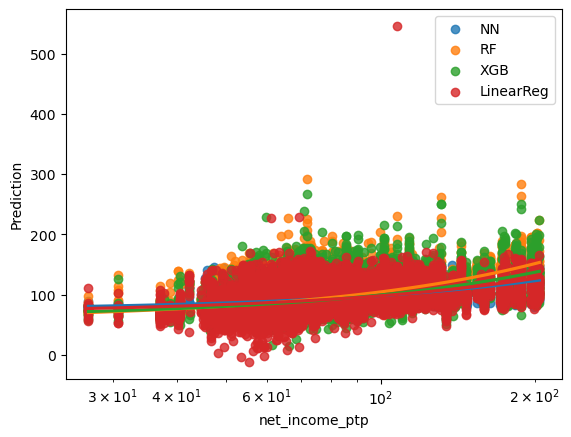

In [193]:
sns.regplot(data = Xsamp.query('net_income_ptp < 250'), x = 'net_income_ptp', y = 'NN',  label='NN')
sns.regplot(data = Xsamp.query('net_income_ptp < 250'), x = 'net_income_ptp', y = 'RF',  label='RF')
sns.regplot(data = Xsamp.query('net_income_ptp < 250'), x = 'net_income_ptp', y = 'XGB',  label='XGB')
sns.regplot(data = Xsamp.query('net_income_ptp < 250'), x = 'net_income_ptp', y = 'LinearReg', label='LinearReg')

plt.legend()
plt.xscale('log')
plt.ylabel('Prediction')

In [ ]:
Xsamp.groupby('net_income_ptp')[models_names]

C:\Users\swietek\AppData\Local\Temp\ipykernel_18424\78235451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shhh = trx.corr().loc[['KAUFKRAFT','MIKRO','MAKROLAGE','KAUFPR'],models_names]
C:\Users\swietek\AppData\Local\Temp\ipykernel_18424\78235451.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shhh = Xsamp.corr().loc[['net_income','net_income_ptp','taxable_income','taxable_income_ptp'],models_names]


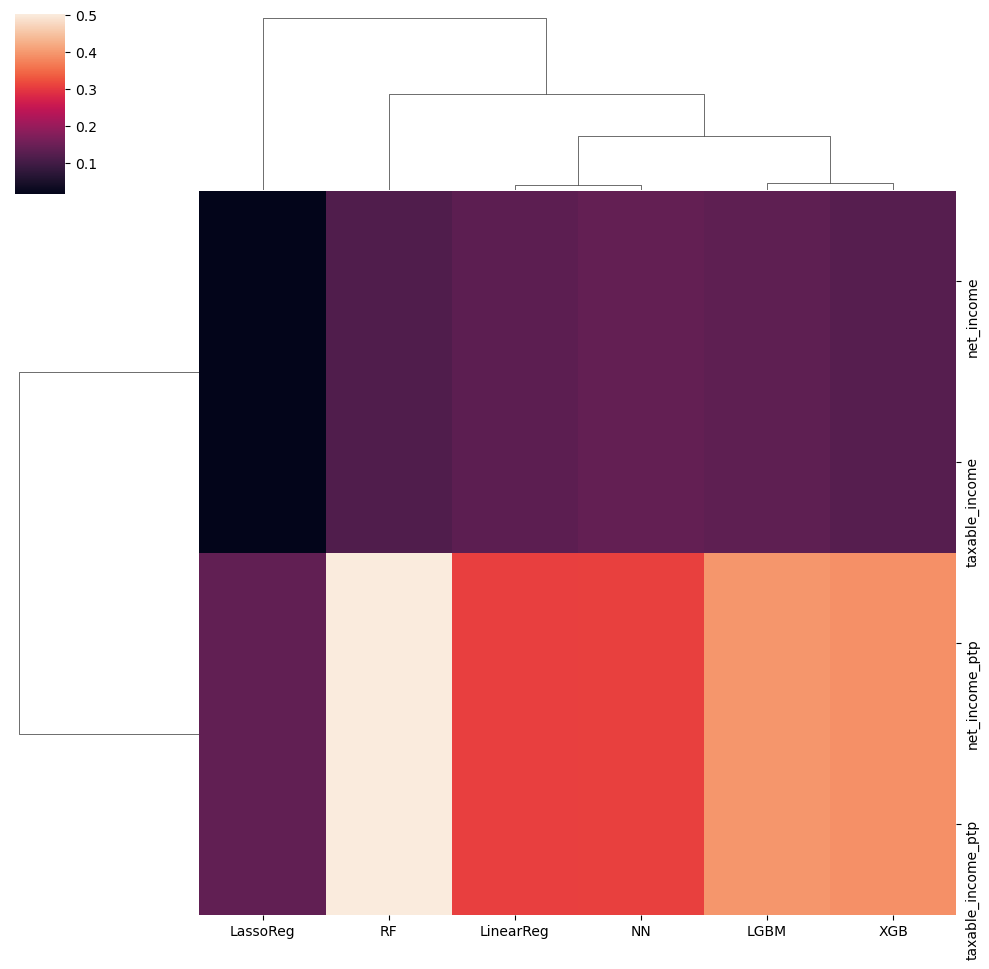

In [179]:
shhh = trx.corr().loc[['KAUFKRAFT','MIKRO','MAKROLAGE','KAUFPR'],models_names]
shhh = Xsamp.corr().loc[['net_income','net_income_ptp','taxable_income','taxable_income_ptp'],models_names]
sns.clustermap(shhh)

In [227]:
cor.sort_values(by = 'XGB').head().round(2)

LinearReg  LassoReg  LGBM    RF   XGB    NN
pano_sum        -0.39      0.25 -0.29 -0.11 -0.24 -0.28
sum_ShFer3      -0.32      0.29 -0.26 -0.11 -0.24 -0.19
vwa_Nat3        -0.30      0.12 -0.24 -0.17 -0.21 -0.24
unit_pano       -0.43      0.13 -0.25 -0.07 -0.21 -0.27
sum_ShMit2      -0.33      0.13 -0.22 -0.07 -0.17 -0.26

In [226]:
cor.sort_values(by = 'XGB').tail().round(2)

LinearReg  LassoReg  LGBM    RF   XGB    NN
maxvsh_sky        0.20      0.03  0.16  0.10  0.15  0.11
cmpx_rh           0.32      0.32  0.20  0.16  0.18  0.28
maxvsh_Gew1       0.26      0.42  0.23  0.19  0.19  0.38
snt_0             0.38     -0.11  0.33  0.21  0.28  0.24
vwa_Gew1          0.66      0.98  0.49  0.42  0.45  0.68

C:\Users\swietek\AppData\Local\Temp\ipykernel_18424\625598767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = Xsamp.corr().loc[model_feats,models_names].dropna()
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


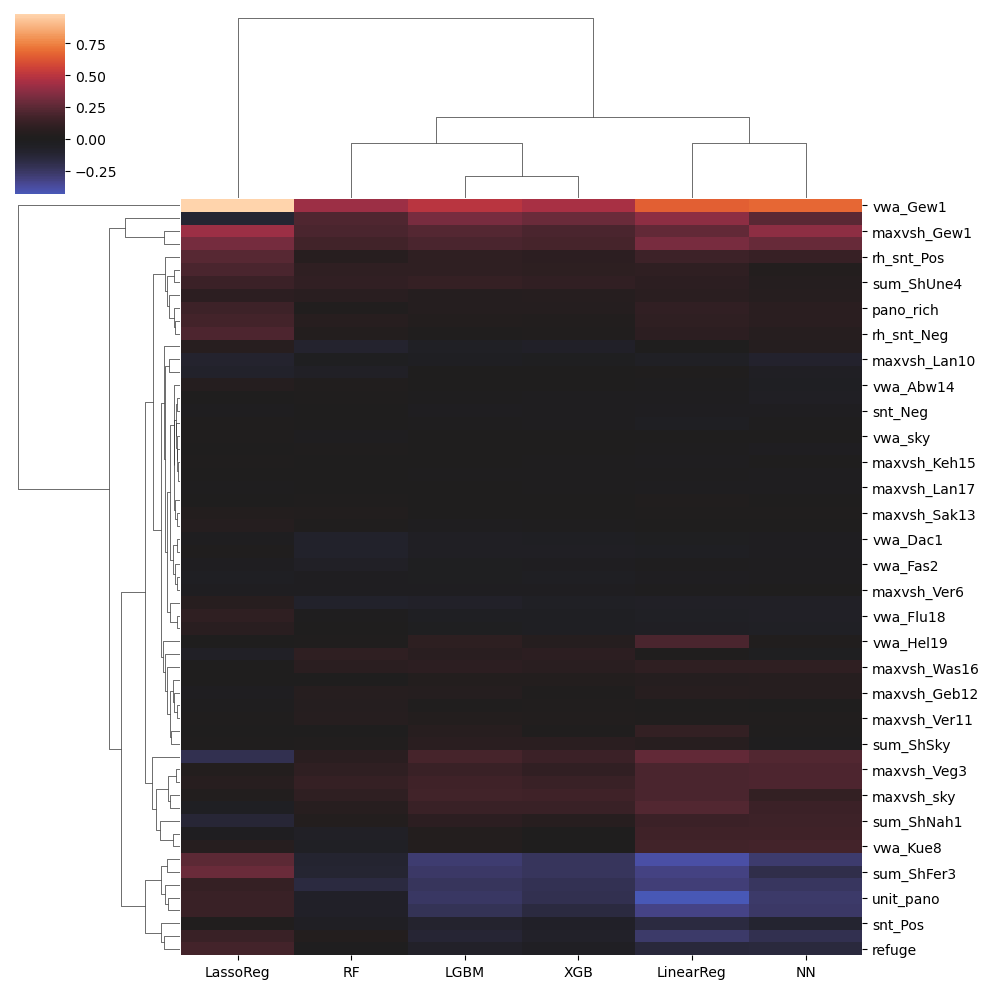

In [222]:
import seaborn as sns
cor = Xsamp.corr().loc[model_feats,models_names].dropna()
# cor = cor.mask(abs(cor)<.1)
sns.clustermap(cor, center=0, square =True, cmap = 'icefire')
# sns.heatmap(cor)

C:\Users\swietek\AppData\Local\Temp\ipykernel_18424\581864365.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = trx.corr().loc[corr_cols,models_names]
c:\Users\swietek\Miniconda3\envs\env_intel_sdb\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


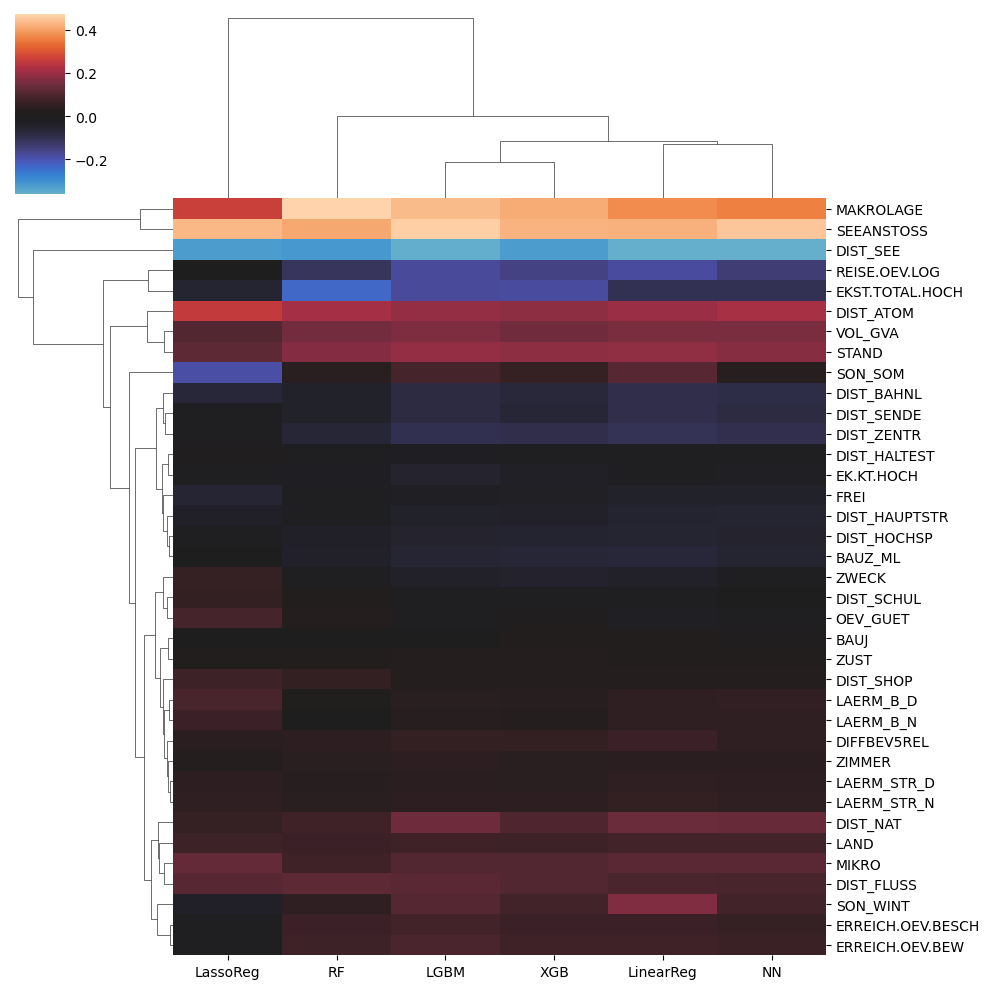

In [115]:
import seaborn as sns
cor = trx.corr().loc[corr_cols,models_names]

sns.clustermap(cor, center=0, square =True,figsize=(10,10))

In [10]:
import umap

fit = umap.UMAP(n_components=2, n_neighbors=50,metric='euclidean')
# fit.fit(X[model_feats].sample(30000).values)
fit.fit(trx[model_feats])

joblib.dump(fit, f"../../geodata/results/umap_on_datx.joblib")

%time ut = fit.transform(trx[model_feats])
# %time u = fit.transform(X[model_feats])


CPU times: total: 31.2 ms
Wall time: 35 ms


In [11]:
import umap

Ufit = umap.UMAP(n_components=2, n_neighbors=50,metric='euclidean')
Xsamp = X.sample(30000).reset_index(drop = True)
Ufit.fit(Xsamp[model_feats])
# fit.fit(trx[model_feats])

joblib.dump(Ufit, f"../../geodata/results/umap_on_dataset.joblib")

# %time ut = fit.transform(trx[model_feats])
%time u = Ufit.transform(Xsamp[model_feats])

CPU times: total: 15.6 ms
Wall time: 24 ms


In [12]:
%time ut = Ufit.transform(trx[model_feats])

trx = pd.concat([pd.DataFrame(ut), trx],axis = 1)
Xsamp = pd.concat([pd.DataFrame(u), Xsamp],axis = 1)

CPU times: total: 2min 19s
Wall time: 1min 55s


In [13]:
cols = ['LAND','MAKROLAGE','SEEANSTOSS','KAUFPR']

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto")
kmeans.fit(Xsamp[model_feats])
Xsamp['kmeans'] = kmeans.labels_

In [16]:
trx[[0,1]] = (Xsamp[[0,1]].max()- trx[[0,1]])/(Xsamp[[0,1]].max()- Xsamp[[0,1]].min())
Xsamp[[0,1]] = (Xsamp[[0,1]].max()- Xsamp[[0,1]])/(Xsamp[[0,1]].max()- Xsamp[[0,1]].min())

In [17]:
from sklearn.cluster import KMeans
Ukmeans = KMeans(n_clusters=8, random_state=0, n_init="auto")
Ukmeans.fit(Xsamp[[0,1]])
Xsamp['Ukmeans'] = Ukmeans.labels_

In [118]:
import hdbscan

reducer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=1).fit(Xsamp[[0,1]])
Xsamp['hdb'] = reducer.labels_
Xsamp['hdb'].nunique()

7

In [19]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=8).fit(Xsamp[[0,1]])
Xsamp['ward'] = clusterer.labels_

In [20]:
Xsamp.hdb.nunique()

7

Text(0.5, 1.0, 'umap+hdb')

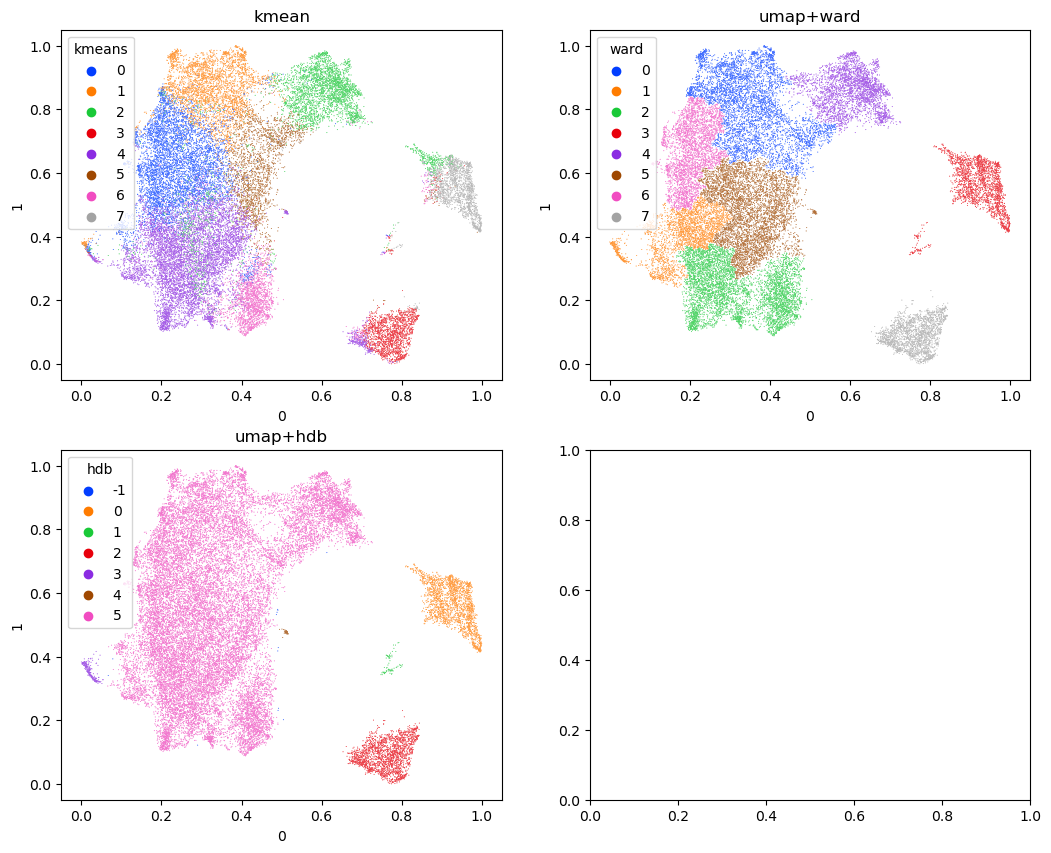

In [27]:
f, ax = plt.subplots(2,2, figsize = (12.5,10))
ax = ax.flatten()

sns.scatterplot(data = Xsamp, x = 0, y = 1, hue = "kmeans", ax = ax[0],palette='bright', s = .5)
sns.scatterplot(data = Xsamp, x = 0, y = 1, hue = "ward", ax = ax[1],palette='bright', s = .5)
sns.scatterplot(data = Xsamp, x = 0, y = 1, hue = "hdb", ax = ax[2],palette='bright', s = .5)

# sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "XGB", ax = ax[2])

ax[0].set_title('kmean')
ax[1].set_title('umap+ward')
ax[2].set_title('umap+hdb')

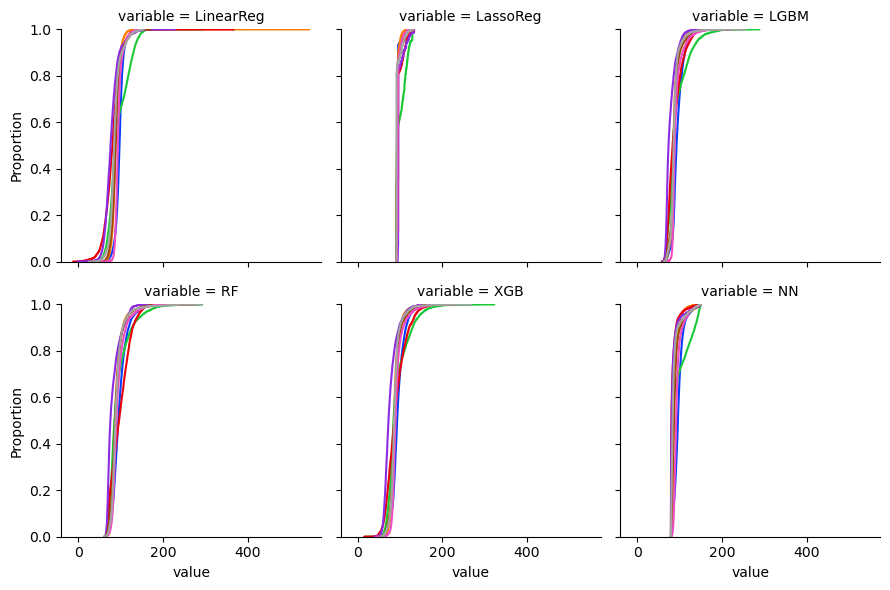

In [203]:
sel_hue = 'ward'
g = sns.FacetGrid(data = Xsamp[[sel_hue]+models_names].melt(id_vars=sel_hue).dropna(), 
                  hue = sel_hue, col='variable', col_wrap=3, palette='bright')

g.map(sns.ecdfplot, 'value')

<Figure size 1000x1000 with 0 Axes>

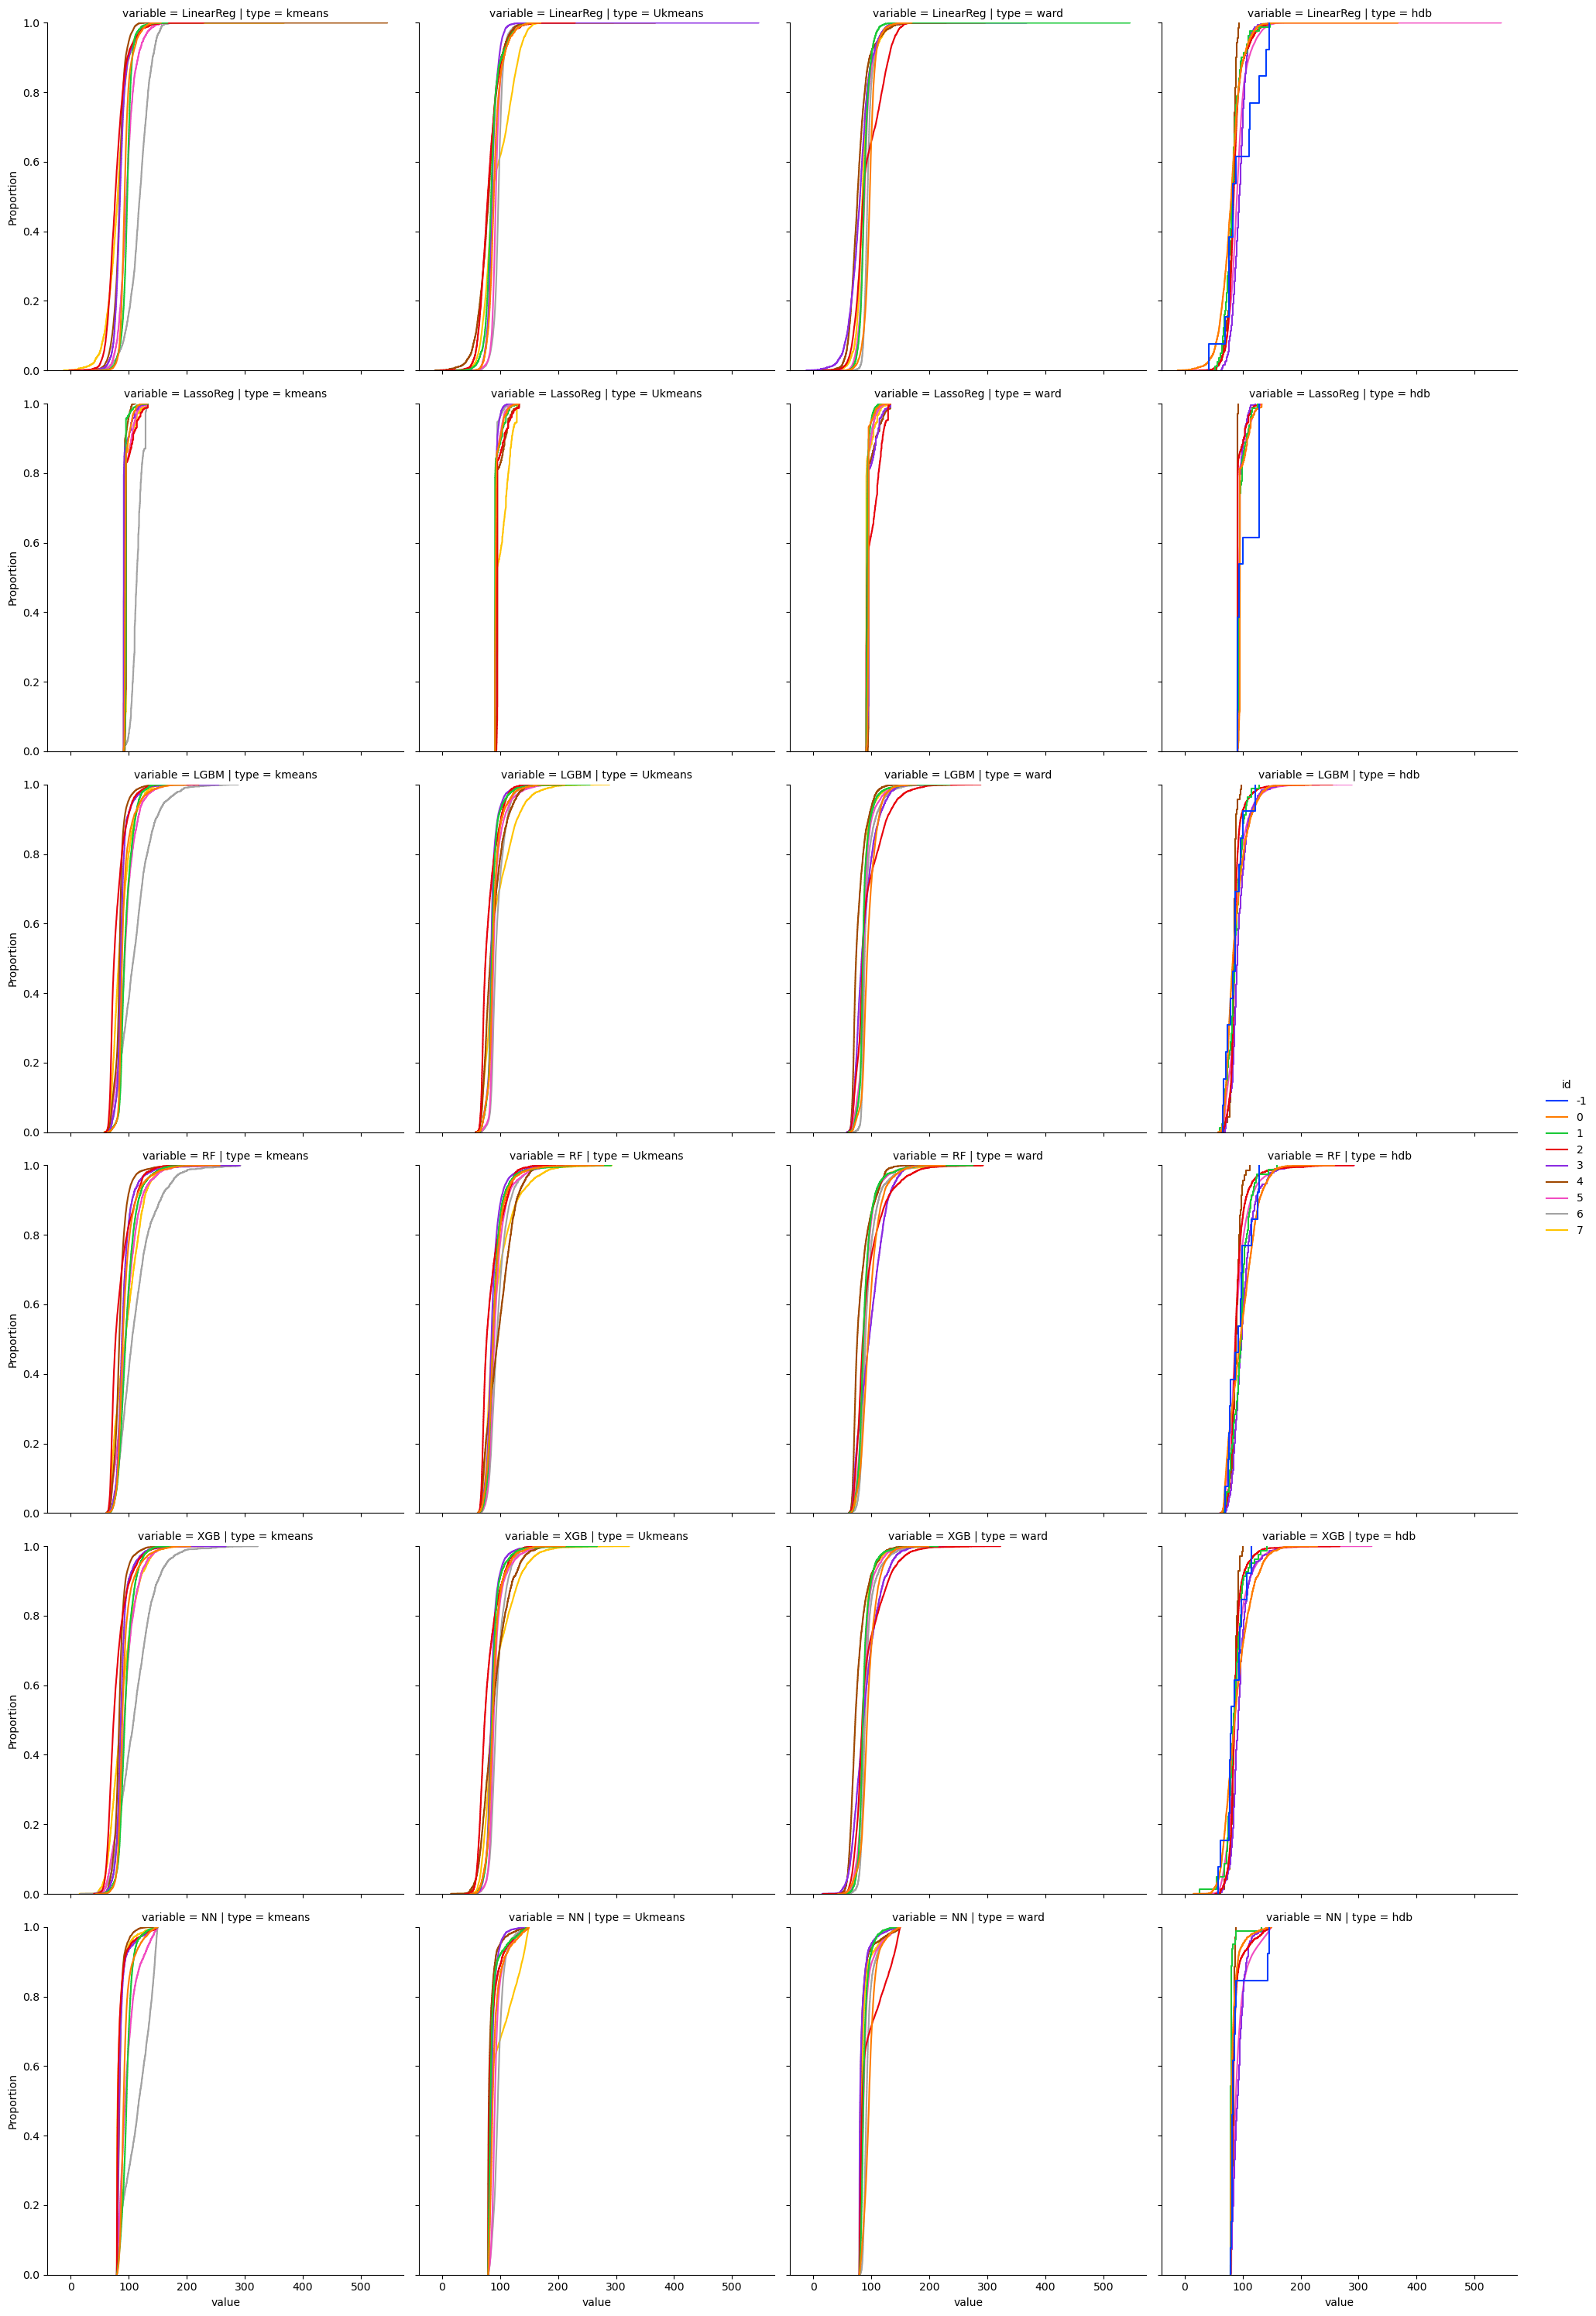

In [117]:
sel_hue = ['kmeans', 'Ukmeans', 'ward', 'hdb']

plt.figure(figsize=(10,10))
sns.displot(data  = Xsamp[sel_hue+models_names].melt(id_vars=sel_hue).melt(id_vars=['variable','value'], var_name='type', value_name='id').dropna(), 
            x = 'value', kind='ecdf',
            hue = 'id', row='variable', col = 'type', palette='bright')

In [134]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(trx[model_feats])
# trx['cluster'] = kmeans.labels_
trx['kmeans'] = kmeans.predict(trx[model_feats])
trx['Ukmeans'] = Ukmeans.predict(trx[[0,1]])


<Axes: xlabel='0', ylabel='1'>

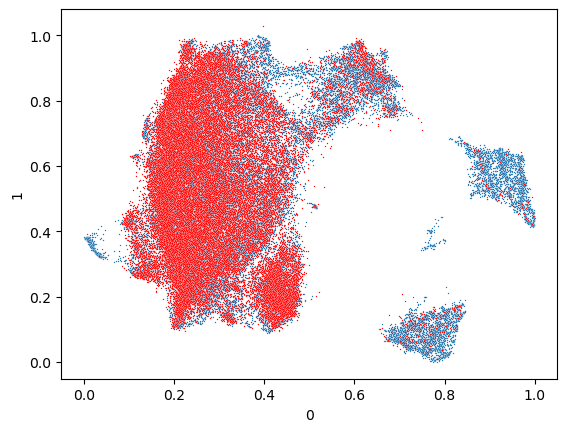

In [30]:
sns.scatterplot(data = Xsamp, x = 0, y = 1, s = 1)
sns.scatterplot(data = trx, x = 0, y = 1, color = 'red', s = 1)

In [38]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=10).fit(trx[[0,1]])
trx['ward'] = clusterer.labels_

In [91]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(min_samples=1,eps = 10).fit(trx[[0,1]])
trx['db'] = clusterer.labels_

In [40]:
import hdbscan

reducer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=1).fit(trx[[0,1]])
trx['hdb'] = reducer.labels_

Text(0.5, 1.0, 'umap+hdb')

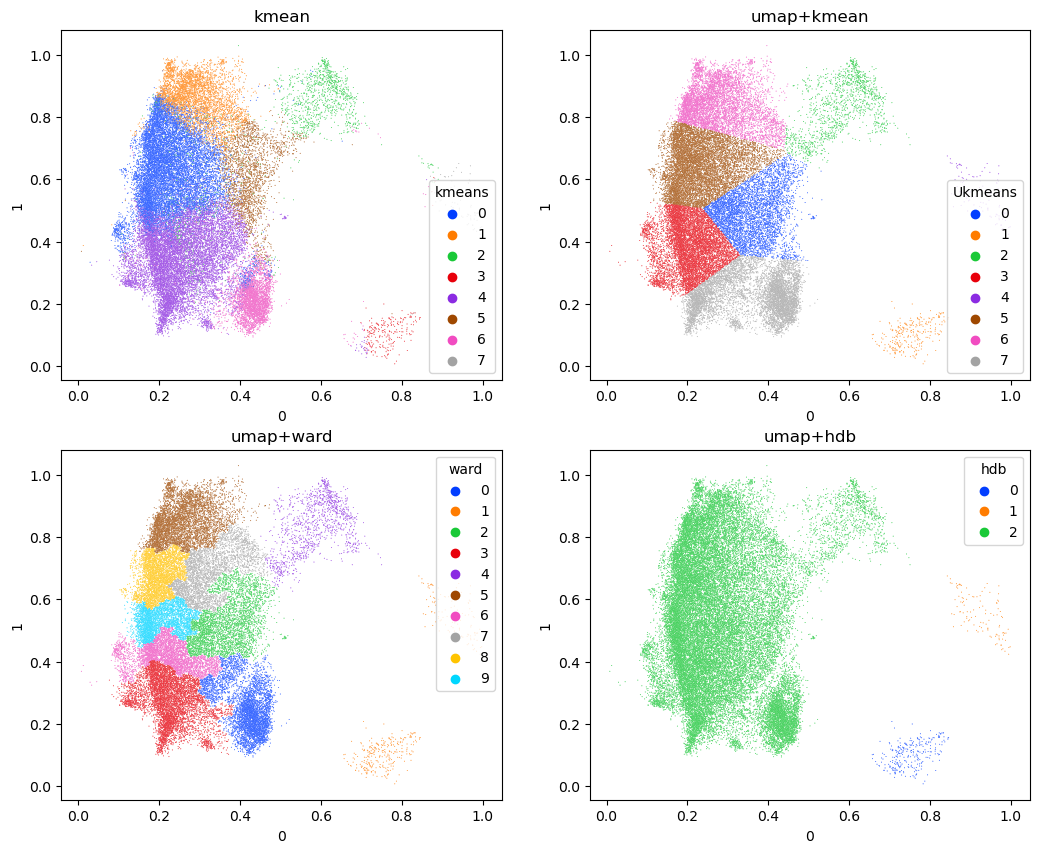

In [79]:
f, ax = plt.subplots(2,2, figsize = (12.5,10))
ax = ax.flatten()

sns.scatterplot(data = trx, x = 0, y = 1, hue = "kmeans", ax = ax[0],palette='bright', s = .5)
sns.scatterplot(data = trx, x = 0, y = 1, hue = "Ukmeans", ax = ax[1],palette='bright', s = .5)
sns.scatterplot(data = trx, x = 0, y = 1, hue = "ward", ax = ax[2],palette='bright', s = .5)
sns.scatterplot(data = trx, x = 0, y = 1, hue = "hdb", ax = ax[3],palette='bright', s = .5)

# sns.scatterplot(data = df.sample(10000), x = 0, y = 1, hue = "XGB", ax = ax[2])

ax[0].set_title('kmean')
ax[1].set_title('umap+kmean')
ax[2].set_title('umap+ward')
ax[3].set_title('umap+hdb')



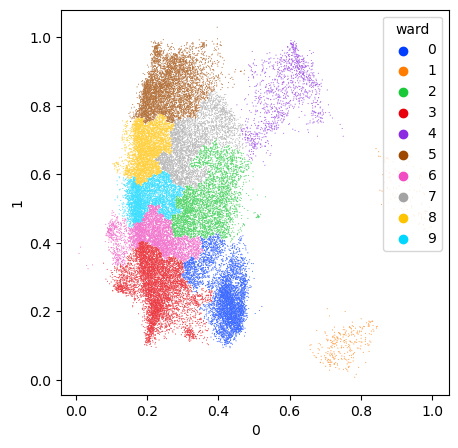

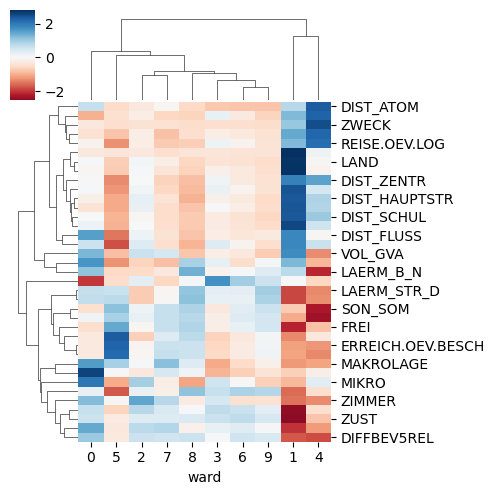

In [139]:
f, ax = plt.subplots(1,1, figsize = (5,5))
sns.scatterplot(data = trx, x = 0, y = 1, hue = "ward", ax = ax,palette='bright', s = .5)

pltme = trx.groupby('ward')[corr_cols].mean()
sns.clustermap(pltme.T, z_score=0, cmap = 'RdBu', center = 0,figsize=(5,5))

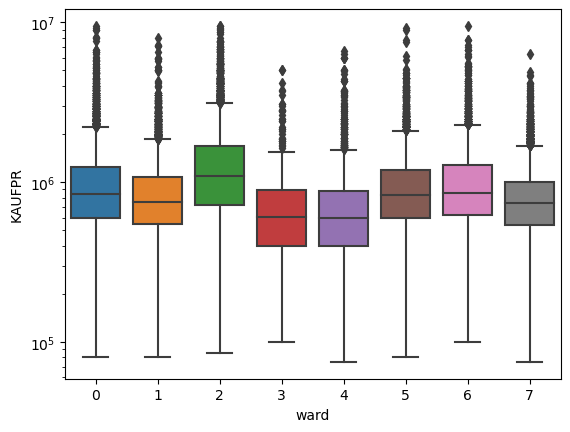

In [37]:
sns.boxplot(data = trx, x = 'ward', y= 'KAUFPR')

plt.yscale('log')

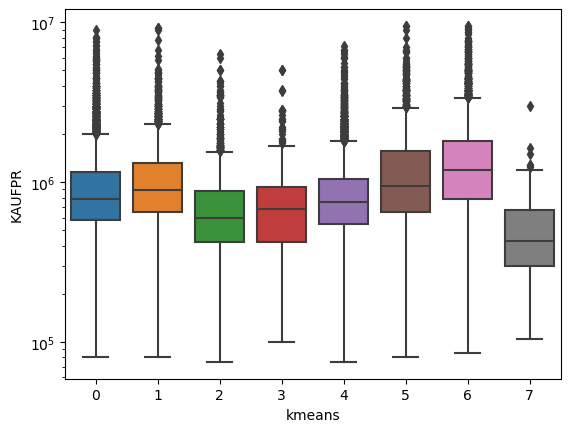

In [41]:
sns.boxplot(data = trx, x = 'kmeans', y= 'KAUFPR')

plt.yscale('log')

<Axes: xlabel='0', ylabel='1'>

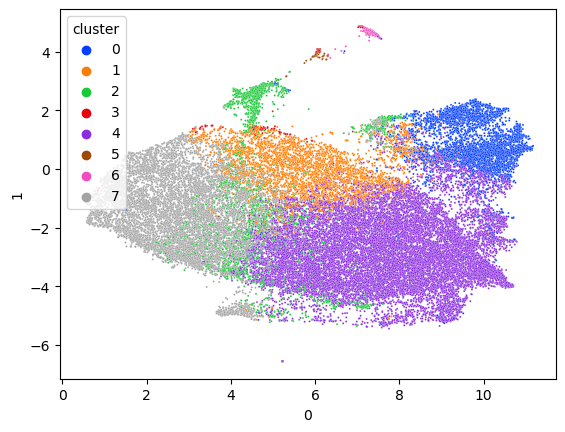

In [34]:
sns.scatterplot(data = trx, x = 0, y = 1, hue = "cluster", s = 2, palette='bright')

In [155]:
model_norms = [nm+'_' for nm in models_names]

In [156]:
Xsamp[model_norms] = (Xsamp[models_names] - Xsamp[models_names].mean())/Xsamp[models_names].std()

<Axes: ylabel='Density'>

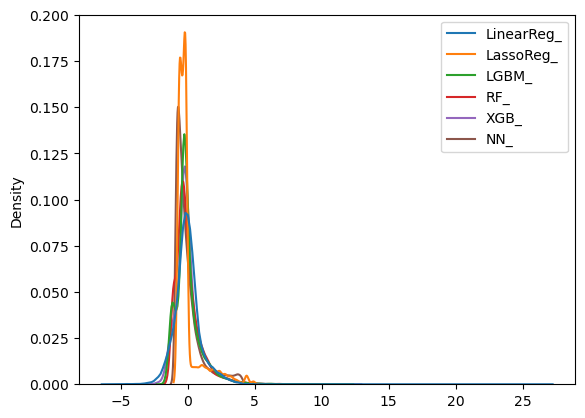

In [161]:
sns.kdeplot(Xsamp[model_norms])

In [233]:
X.groupby('GMDNAME')[models_names].skew()

LinearReg  LassoReg      LGBM        RF       XGB         NN
GMDNAME                                                                   
Aadorf         0.803103  4.751182  2.164725  1.629022  1.510658   1.955144
Aarau          1.623024  4.374062  1.462016  1.642394  1.238897   1.843021
Aarberg        2.126107  4.637146  1.403628  1.540956  1.212536   2.432958
Aarburg        1.712803  4.231570  1.846867  2.195681  1.619135   2.827048
Aarwangen      2.059083  4.763742  1.836569  1.508065  0.665501   2.853487
...                 ...       ...       ...       ...       ...        ...
Zwieselberg    1.009801  2.291794  1.129815  1.259155  1.064167   2.693346
Zwingen        2.209174  3.563732  2.079652  3.962723  1.639682   2.899122
Zwischbergen   0.502056  3.834796  1.898949  0.708240  1.057987  11.739869
Zäziwil        0.220891  5.617314  1.008647  1.714244  0.949862   1.812963
Zürich         1.918270  3.691697  2.244038  1.810897  1.967406   1.622052

[2222 rows x 6 columns]

In [258]:
Z = X[models_names].subtract(X.net_income_ptp, axis = 0).dropna()

X.loc[Z.index,:].GMDNAME

1                        Zürich
2          Brione sopra Minusio
3                        Termen
4                         Spiez
5                  Münchenstein
                   ...         
3299403              Freienbach
3299404                  Sarnen
3299406          Stein am Rhein
3299407                Boncourt
3299408                  Ascona
Name: GMDNAME, Length: 2651723, dtype: object

<Axes: ylabel='Proportion'>

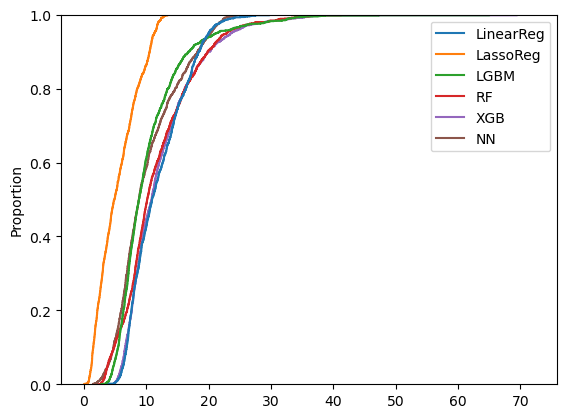

In [263]:
Z = X[models_names].subtract(X.net_income_ptp, axis = 0).dropna()

Z = Z.groupby(X.loc[Z.index,:].GMDNAME)[models_names].std()

sns.ecdfplot(Z)

# plt.xlim(-100,100)

<Axes: ylabel='Proportion'>

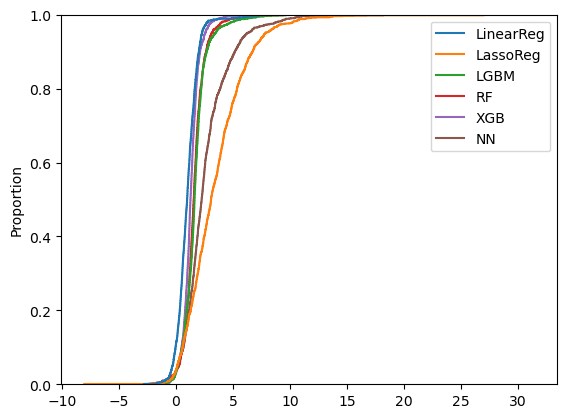

In [262]:
Z = X[models_names].subtract(X.net_income_ptp, axis = 0).dropna()

Z = Z.groupby(X.loc[Z.index,:].GMDNAME)[models_names].skew()

sns.ecdfplot(Z)

# plt.xlim(-100,100)

(-100.0, 100.0)

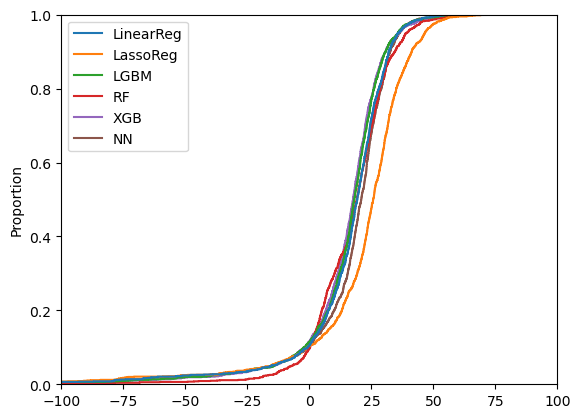

In [260]:
Z = X[models_names].subtract(X.net_income_ptp, axis = 0).dropna()

Z = Z.groupby(X.loc[Z.index,:].GMDNAME)[models_names].mean()

sns.ecdfplot(Z)

plt.xlim(-100,100)

<Axes: ylabel='Proportion'>

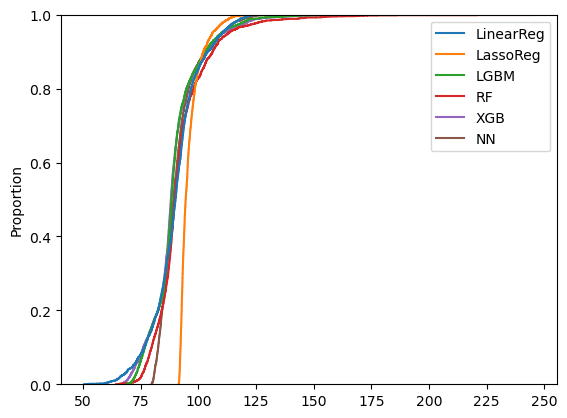

In [235]:
Z = X.groupby('GMDNAME')[models_names].mean()

sns.ecdfplot(Z)

<Axes: ylabel='Proportion'>

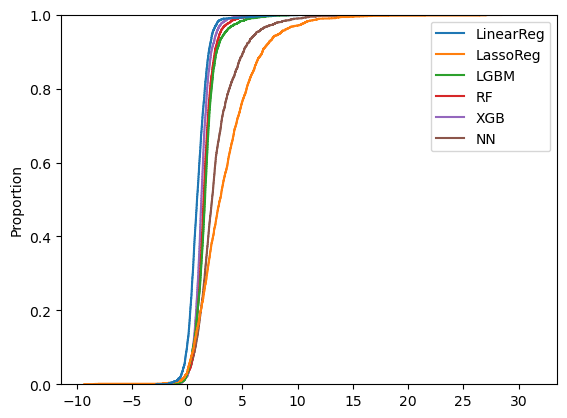

In [234]:
Z = X.groupby('GMDNAME')[models_names].skew()

sns.ecdfplot(Z)



In [199]:
X.query('Agglo_Name in ["Lausanne"]').GMDNAME.unique()

array(['Bioley-Orjulaz', 'Lutry', 'Epalinges', 'Renens (VD)',
       'Lully (VD)', 'Echandens', 'Pully', 'Vuarrens',
       'Saint-Sulpice (VD)', 'Bourg-en-Lavaux', 'Savigny', 'Chexbres',
       'Morges', 'Lausanne', 'Tolochenaz', 'Ecublens (VD)',
       'Bretigny-sur-Morrens', 'Jorat-Mézières', 'Buchillon',
       'Préverenges', 'La Sarraz', 'Pampigny', 'Aclens', 'Cugy (VD)',
       'Echallens', 'Lonay', 'Etoy', 'Saint-Prex', 'Vufflens-le-Château',
       'Cossonay', 'Bussy-Chardonney', 'Chigny', 'Penthaz', 'Froideville',
       'Le Mont-sur-Lausanne', 'Jouxtens-Mézery', 'Chavornay',
       'Cheseaux-sur-Lausanne', 'Romanel-sur-Lausanne', 'Montilliez',
       'Montpreveyres', 'Assens', 'Echichens', 'Morrens (VD)', 'Mex (VD)',
       'Servion', 'Vufflens-la-Ville', 'Yens', 'Bercher', 'Denges',
       'Montricher', 'Etagnières', 'Prilly', 'Penthalaz', 'Bottens',
       'Bussigny', 'Belmont-sur-Lausanne', 'Denens', 'Crissier', 'Rivaz',
       'Eclépens', 'Poliez-Pittet', 'Daillens', 'Jor

In [264]:
Z = X[models_names].subtract(X.net_income_ptp, axis = 0)

In [266]:
X[model_norms] = X[models_names].subtract(X.net_income_ptp, axis = 0)

<Axes: >

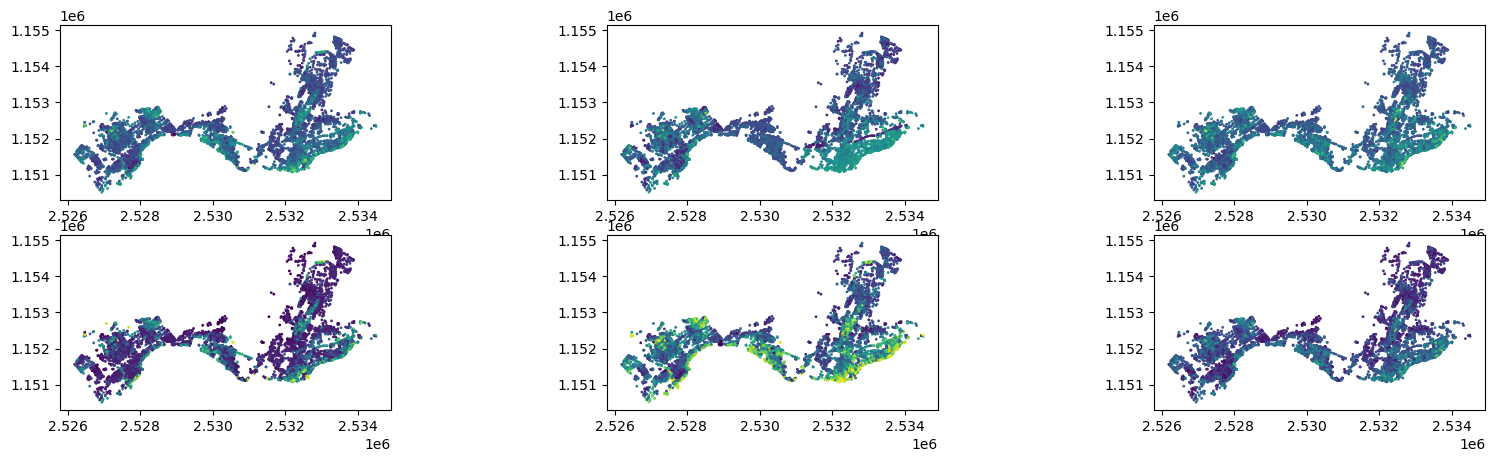

In [274]:
f, ax = plt.subplots(2,3, figsize = (20,5))
ax = ax.flatten()

comms = ["Ecublens (VD)","Saint-Sulpice (VD)","Préverenges","Morges"]
X.query('GMDNAME in @comms').plot("LinearReg", markersize = 1, ax = ax[0])
X.query('GMDNAME in @comms').plot("RF", markersize = 1, ax = ax[1])
X.query('GMDNAME in @comms').plot("XGB", markersize = 1, ax = ax[2])
X.query('GMDNAME in @comms').plot("LassoReg", markersize = 1, ax = ax[3])
X.query('GMDNAME in @comms').plot("NN", markersize = 1, ax = ax[4])
X.query('GMDNAME in @comms').plot("LGBM", markersize = 1, ax = ax[5])

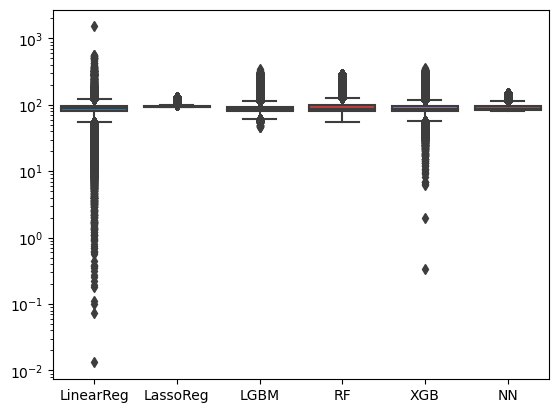

In [282]:
sns.boxplot(X[models_names])

plt.yscale('log')

In [294]:
X.net_income_ptp.describe().round()

count    2651723.0
mean          75.0
std           28.0
min           27.0
25%           63.0
50%           69.0
75%           78.0
max          960.0
Name: net_income_ptp, dtype: float64

In [292]:
X[model_norms].dropna().describe().round(2)

LinearReg_   LassoReg_       LGBM_         RF_        XGB_         NN_
count  2651723.00  2651723.00  2651723.00  2651723.00  2651723.00  2651723.00
mean        15.80       21.62       15.13       17.67       14.91       17.29
std         27.59       27.75       25.88       24.83       26.52       26.86
min       -930.65     -864.33     -892.93     -895.98     -907.39     -880.08
25%          8.09       16.91        7.93        6.53        6.26       11.85
50%         18.20       25.50       16.68       16.63       15.92       19.72
75%         27.54       33.04       24.92       27.30       25.24       27.05
max        510.09      105.96      235.82      227.51      281.27      118.18

In [287]:
X[models_names].describe().round(2)

LinearReg    LassoReg        LGBM          RF         XGB          NN
count  3299410.00  3299410.00  3299410.00  3299410.00  3299410.00  3299410.00
mean        90.27       96.32       89.77       92.38       89.59       91.70
std         16.79        7.49       16.75       19.96       18.62       14.16
min        -97.81       91.34       45.76       55.53      -38.86       79.48
25%         81.01       92.31       81.34       80.42       79.72       82.30
50%         89.23       94.26       86.73       87.98       86.69       87.01
75%         97.71       95.24       94.26       99.14       95.33       95.14
max       1515.53      132.86      346.08      292.44      358.64      149.69

<Axes: >

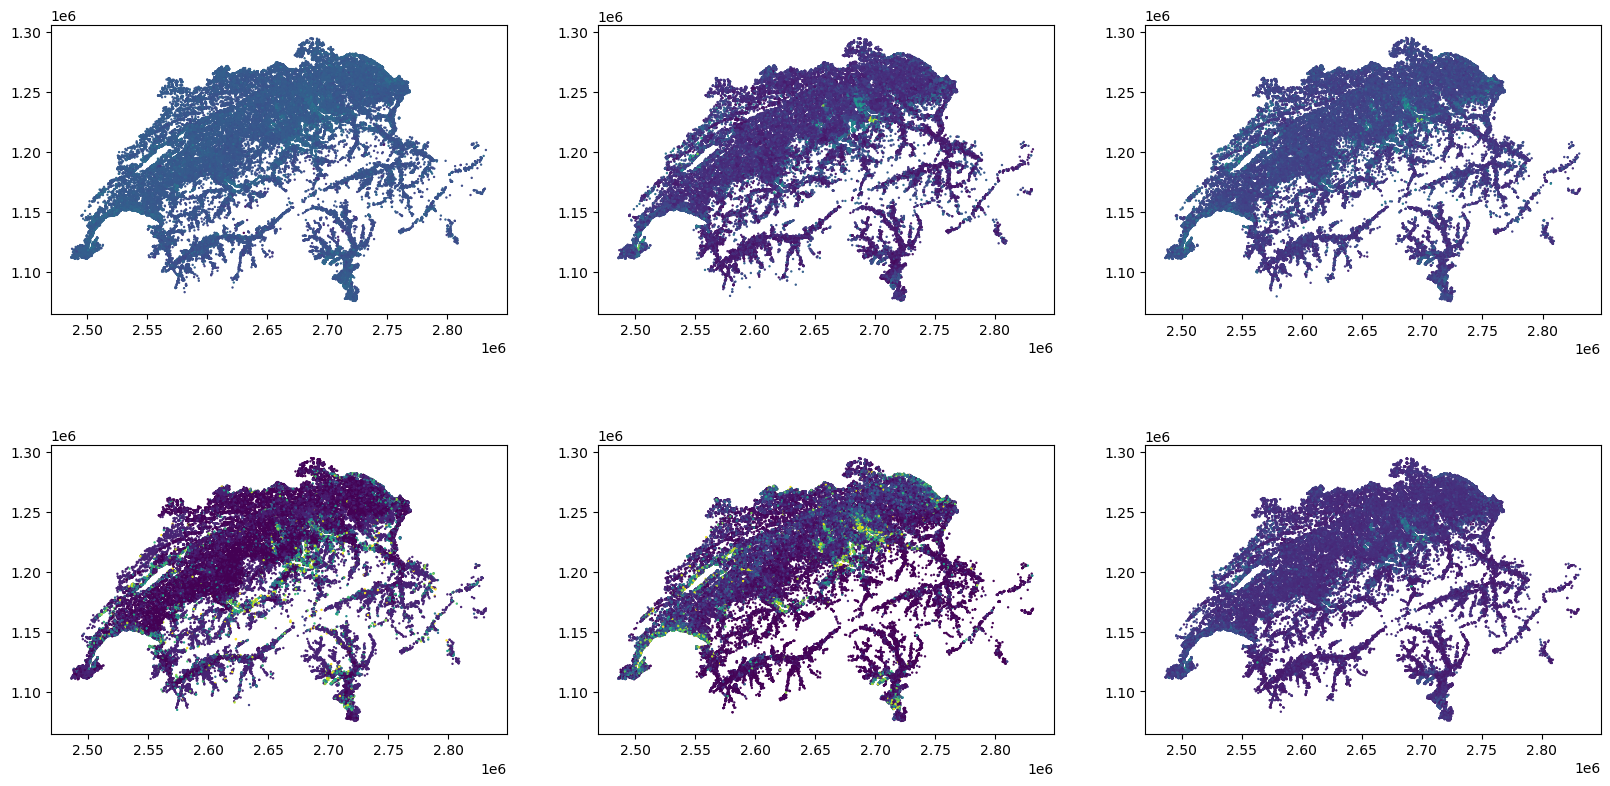

In [283]:
# X.sample(100000).plot('NN', markersize = 1)

f, ax = plt.subplots(2,3, figsize = (20,10))
ax = ax.flatten()

comms = ["Ecublens (VD)","Saint-Sulpice (VD)","Préverenges","Morges"]
X.sample(100000).plot("LinearReg", markersize = .5, ax = ax[0])
X.sample(100000).plot("RF", markersize = .5, ax = ax[1])
X.sample(100000).plot("XGB", markersize = .5, ax = ax[2])
X.sample(100000).plot("LassoReg", markersize = .5, ax = ax[3])
X.sample(100000).plot("NN", markersize = .5, ax = ax[4])
X.sample(100000).plot("LGBM", markersize = .5, ax = ax[5])

<Axes: >

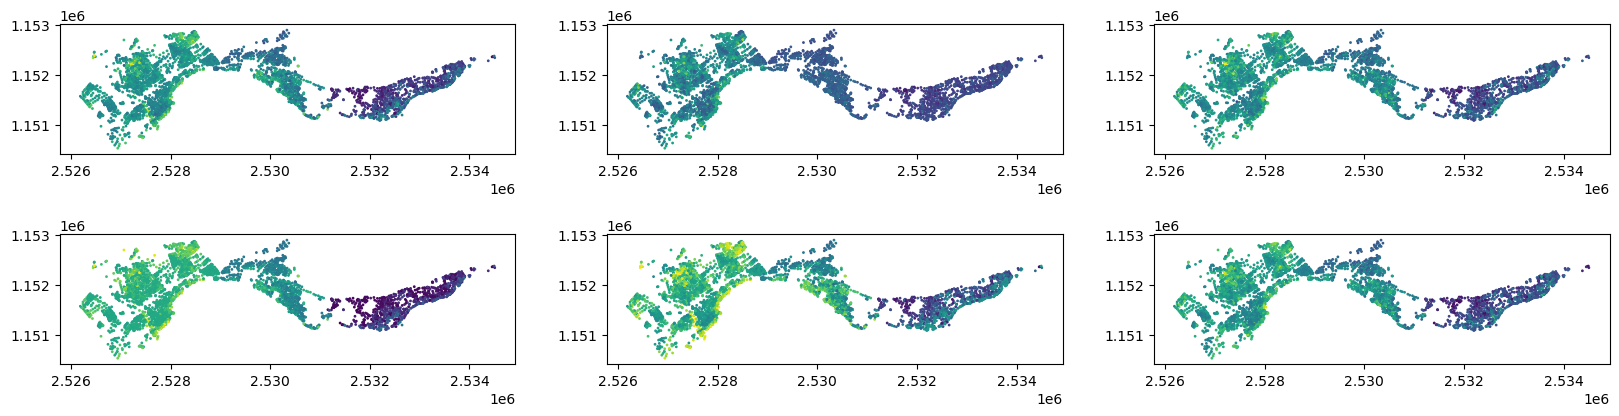

In [271]:
f, ax = plt.subplots(2,3, figsize = (20,5))
ax = ax.flatten()

X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("LinearReg", markersize = 1, ax = ax[0])
X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("RF", markersize = 1, ax = ax[1])
X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("XGB", markersize = 1, ax = ax[2])
X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("LassoReg", markersize = 1, ax = ax[3])
X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("NN", markersize = 1, ax = ax[4])
X.query('GMDNAME in ["Saint-Sulpice (VD)","Préverenges","Morges"]').plot("LGBM", markersize = 1, ax = ax[5])


<Axes: >

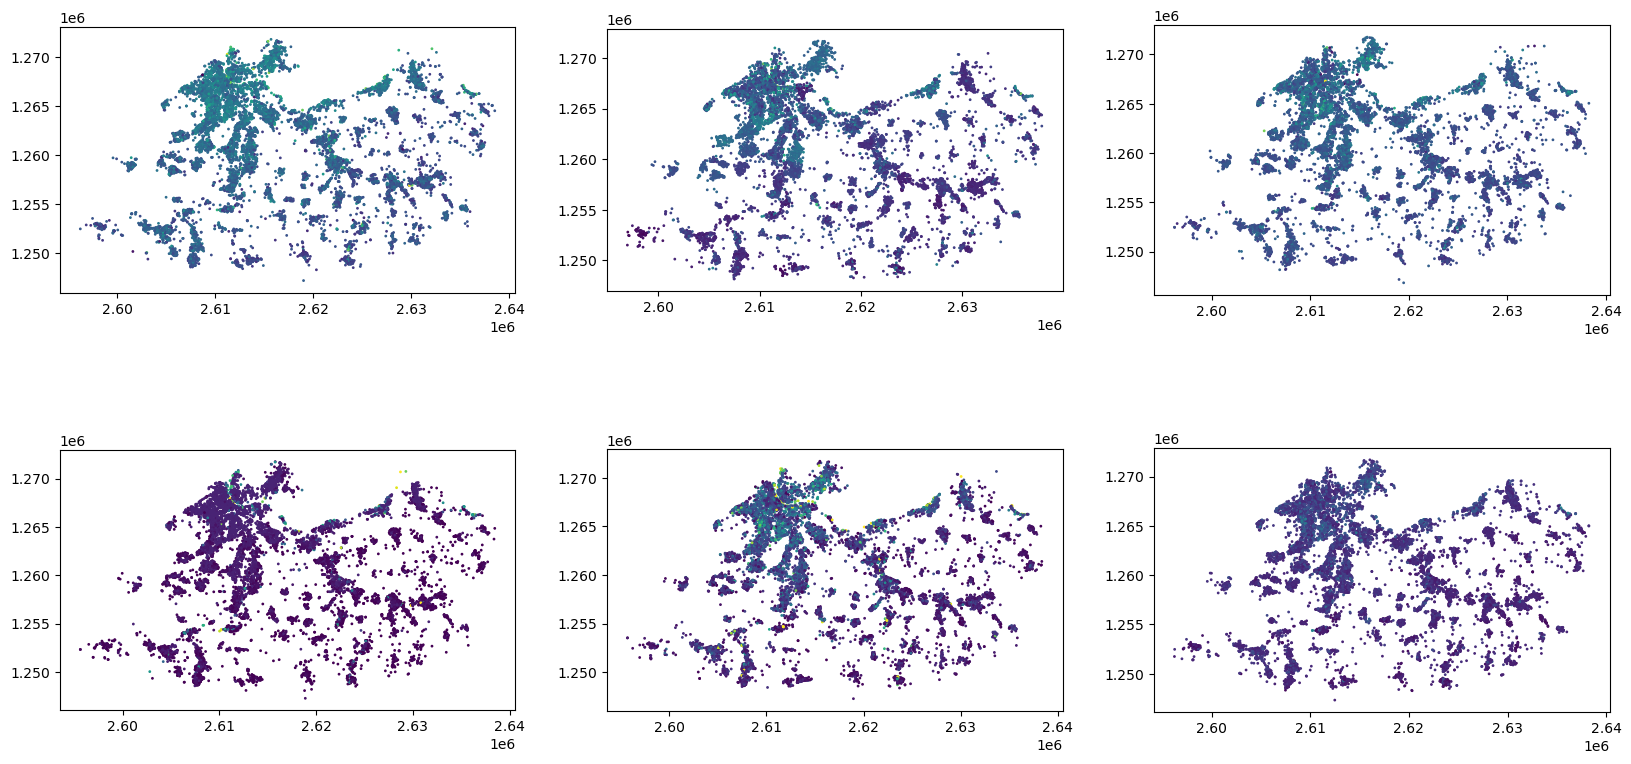

In [276]:
f, ax = plt.subplots(2,3, figsize = (20,10))
ax = ax.flatten()
X.query('Agglo_Name == "Basel"').sample(10000).plot("LinearReg", markersize = 1, ax = ax[0])
X.query('Agglo_Name == "Basel"').sample(10000).plot("RF", markersize = 1, ax = ax[1])
X.query('Agglo_Name == "Basel"').sample(10000).plot("XGB", markersize = 1, ax = ax[2])
X.query('Agglo_Name == "Basel"').sample(10000).plot("LassoReg", markersize = 1, ax = ax[3])
X.query('Agglo_Name == "Basel"').sample(10000).plot("NN", markersize = 1, ax = ax[4])
X.query('Agglo_Name == "Basel"').sample(10000).plot("LGBM", markersize = 1, ax = ax[5])




<Axes: xlabel='0', ylabel='1'>

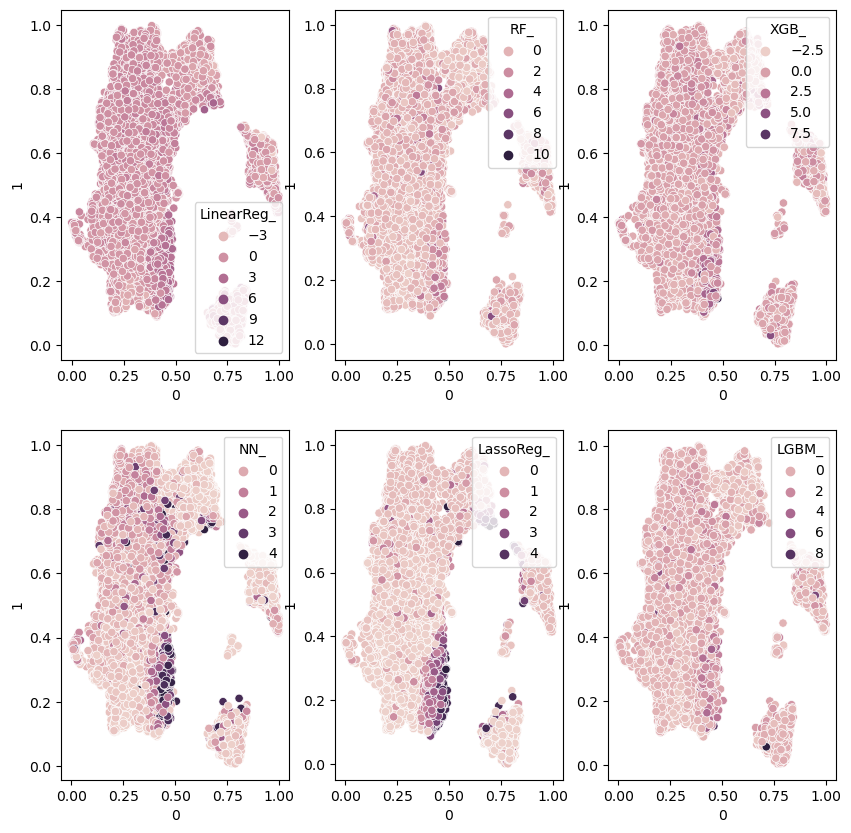

In [164]:
f, ax = plt.subplots(2,3, figsize = (10,10), squeeze=True)
ax = ax.flatten()

sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "LinearReg_", ax = ax[0])
sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "RF_", ax = ax[1])
sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "XGB_", ax = ax[2])
sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "NN_", ax = ax[3])
sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "LassoReg_", ax = ax[4])
sns.scatterplot(data = Xsamp.sample(10000), x = 0, y = 1, hue = "LGBM_", ax = ax[5])




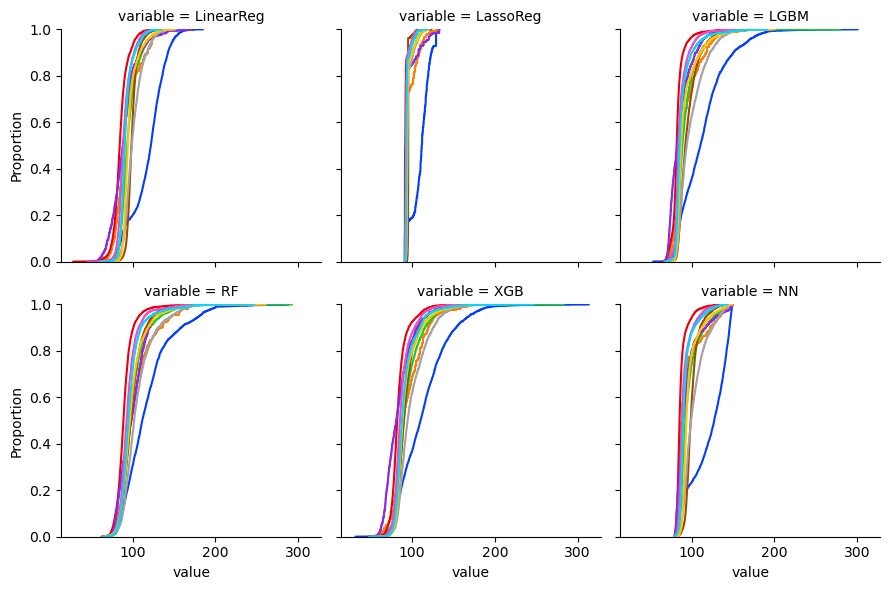

In [140]:
sel_hue = 'ward'
g = sns.FacetGrid(data = trx[[sel_hue]+models_names].melt(id_vars=sel_hue).dropna(), 
                  hue = sel_hue, col='variable', col_wrap=3, palette='bright')

g.map(sns.ecdfplot, 'value')